# Visualizing text

In [1]:
import hypertools as hyp
import wikipedia as wiki
%matplotlib inline

In this example, we will download some text from wikipedia, split it up into chunks and then plot it. We will use the wikipedia package to retrieve the wiki pages for 'dog' and 'cat'.

In [2]:
def chunk(s, count):
    return [''.join(x) for x in zip(*[list(s[z::count]) for z in range(count)])]

chunk_size = 5

dog_text = wiki.page('Dog').content
cat_text = wiki.page('Cat').content

dog = chunk(dog_text, len(dog_text)/chunk_size)
cat = chunk(cat_text, len(cat_text)/chunk_size)

Below is a snippet of some of the text from the dog wikipedia page.  As you can see, the word dog appears in many of the sentences, but also words related to dog like wolf and carnivore appear.

In [3]:
dog[0][:1000]

u'The domestic dog (Canis lupus familiaris or Canis familiaris) is a member of the genus Canis (canines), which forms part of the wolf-like canids, and is the most widely abundant terrestrial carnivore. The dog and the extant gray wolf are sister taxa as modern wolves are not closely related to the wolves that were first domesticated, which implies that the direct ancestor of the dog is extinct. The dog was the first species to be domesticated and has been selectively bred over millennia for various behaviors, sensory capabilities, and physical attributes.\nTheir long association with humans has led dogs to be uniquely attuned to human behavior and they are able to thrive on a starch-rich diet that would be inadequate for other canid species. New research seems to show that dogs have mutations to equivalent genetic regions in humans where changes are known to trigger high sociability and somewhat reduced intelligence. Dogs vary widely in shape, size and colors. Dogs perform many roles 

Now we will simply pass the text samples as a list to `hyp.plot`.  By default hypertools will transform the text data using a topic model that was fit on a variety of wikipedia pages.  Specifically, the text is vectorized using the scikit-learn `CountVectorizer` and then passed on to a `LatentDirichletAllocation` to estimate topics.  As can be seen below, the 5 chunks of text from the dog/cat wiki pages cluster together, suggesting they are made up of distint topics.

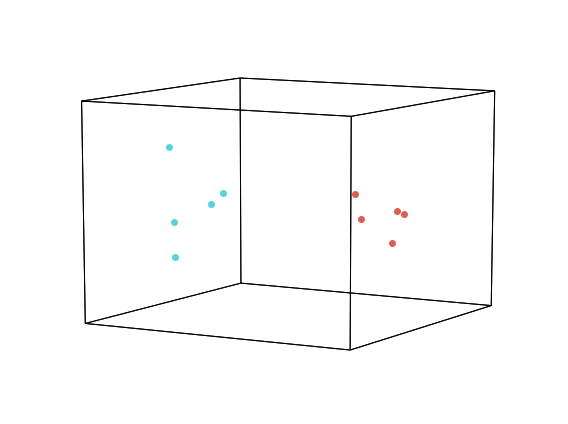

In [4]:
hue=['dog']*chunk_size+['cat']*chunk_size
geo = hyp.plot(dog + cat, 'o', hue=hue, size=[8, 6])

Now, let's add a third very different topic to the plot.

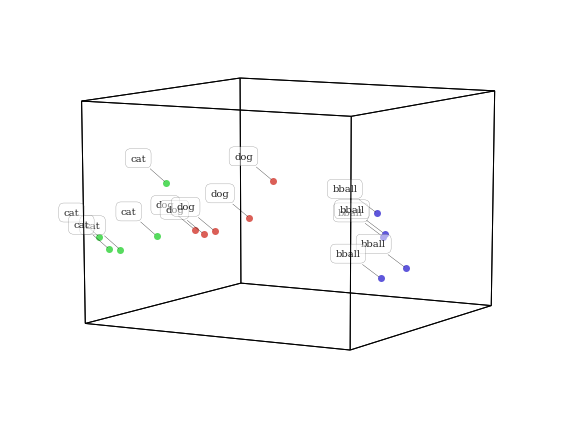

In [5]:
bball_text = wiki.page('Basketball').content
bball = chunk(bball_text, len(bball_text)/chunk_size)

hue=['dog']*chunk_size+['cat']*chunk_size+['bball']*chunk_size
geo = hyp.plot(dog + cat + bball, 'o', hue=hue, labels=hue, size=[8, 6])

As you might expect, the cat and dog text chunks are closer to each other than to basketball in this topic space. Since cats and dogs are both animals, they share many more features (and thus are described with similar text) than basketball.

## Visualizing NIPS papers

The next example is a dataset of all NIPS papers published from 1987.  They are fit and transformed using the text from each paper. This example dataset can be loaded using the code below.

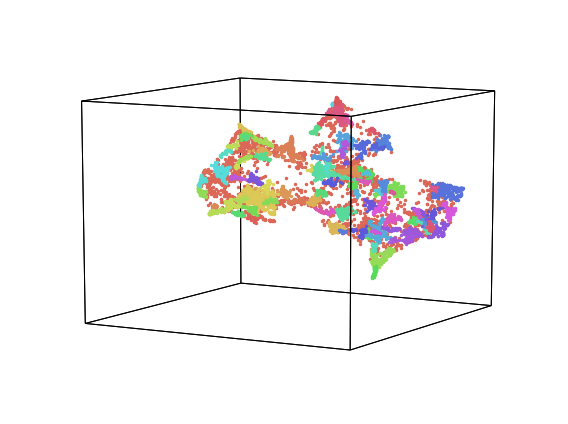

In [6]:
nips = hyp.load('nips')
nips.plot(size=[8, 6])

## Defining a corpus

Now let's change the corpus used to train the text model.  Specifically, we'll use the 'wiki' text, a diverse collection of wikipedia articles to fit the model.  To do this, set `corpus='wiki'`.  You can also specify your own text (as a list of text samples) to train the model.

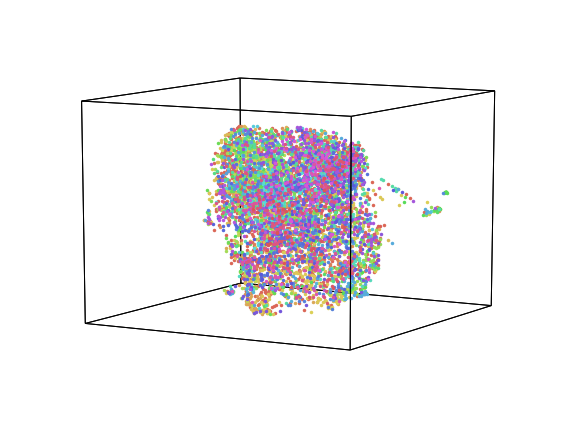

In [7]:
nips_wiki = nips.plot(corpus='wiki', size=[8, 6])

Comparing between the this plot and a the previous, it is clear that there is much more structure in the first plot.  There are a few reasons for this. The 'wiki' model is a much more general text model: It can quantify many diverse topics but this is at the expense of specificity for more similar documents. Indeed, many NIPS articles use similar language to describe similar topics.  Also, the first plot is both trained and fit on the NIPS articles.  This leads to much better separation between the topics.

## Visualizing State of the Union Addresses

In this example we will plot each state of the union address from 1989 to present.  The dots are colored and labeled by president.  The semantic model that was used to transform is the default 'wiki' model, which is a CountVectorizer->LatentDirichletAllocation pipeline fit with a selection of wikipedia pages. As you can see below, the points generally seem to cluster by president, but also by party affiliation (democrats mostly on the left and republicans mostly on the right).

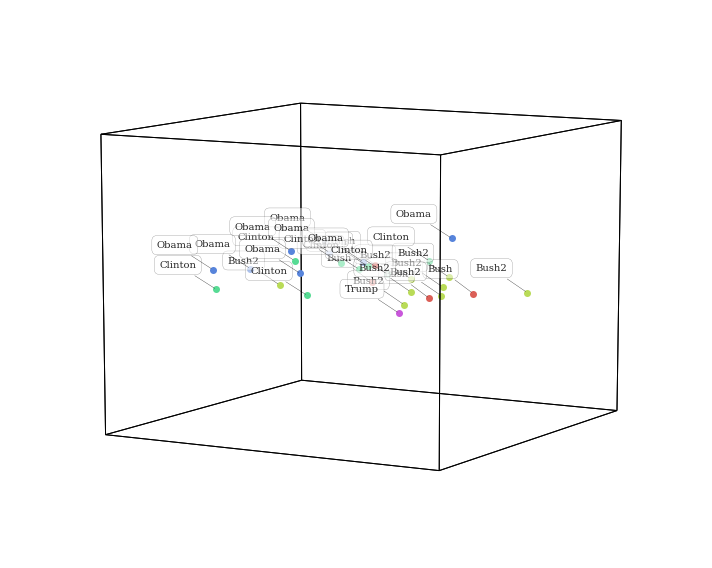

In [8]:
sotus = hyp.load('sotus')
sotus.plot(size=[10,8])

## Changing the reduction model

These data are reduce with PCA.  Want to visualize using a different algorithm? Simply change the `reduce` parameter. This gives a different, but equally interesting lower dimensional representation of the data.

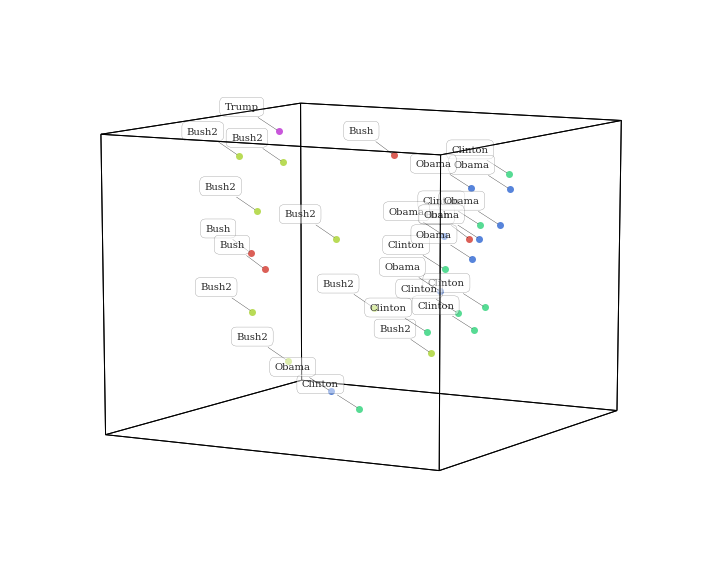

In [9]:
sotus.plot(reduce='UMAP', size=[10, 8])